# **Model Training**

**1.1 Import Data and Required Packages**
<br><br>Importing Pandas, Numpy, matplotlib, Seaborn, Scikit-learn and Warnings library.

In [96]:
# Basic Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#Modelling
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import warnings

**Import the CSV Data as Pandas DataFrame**

In [97]:
df = pd.read_csv("data/stud.csv")

**Show Top 5 Records**

In [98]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Preparing X and Y Variables**
<br><br>We are Goining to Predict Math Score based on the other Information.

In [99]:
X = df.drop(columns=['math_score'],axis=1)

In [100]:
X.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88


In [101]:
Y = df['math_score']

In [102]:
Y.head(2)

0    72
1    69
Name: math_score, dtype: int64

**Creating a Column Transformer**

In [103]:
# Creating a Column Transformer with 3 types of transformer
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)

In [104]:
X=preprocessor.fit_transform(X)

In [105]:
X.shape

(1000, 19)

**Spliting the Dataset into Train_Test_Split**

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape , X_test.shape

((800, 19), (200, 19))

**Create a Evaluate Function to give all metrics after model training**

In [107]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,mse,rmse,r2_square

In [112]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBregressor" : XGBRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor()
    }
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i] # Iterates over the models
    model.fit(X_train,y_train) # Train model
    
    #make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Perfomance for Training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    r2_list.append(model_test_r2)
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model Perfomance for Training set
- Root Mean Squared Error: 5.3273
- Mean Absolute Error: 4.2787
- Mean Squared Error: 28.3805
- R2 Score: 0.8741
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4096
- Mean Absolute Error: 4.2259
- R2 Score: 0.8797


Lasso
Model Perfomance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- Mean Squared Error: 43.4784
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model Perfomance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- Mean Squared Error: 28.3378
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model Perfomance for Training set
- Root Mean Squared 

**Results**

In [113]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
4,Decision Tree,0.880593
5,Random Forest Regressor,0.880593
0,Linear Regression,0.879740
1,Lasso,0.879740
2,Ridge,0.825320
3,K-Neighbors Regressor,0.825320
6,XGBregressor,0.783898
7,AdaBoost Regressor,0.783898


## **Linear Regression**

In [114]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.97


**Plot y_pred and y_test**

Text(0, 0.5, 'predicted')

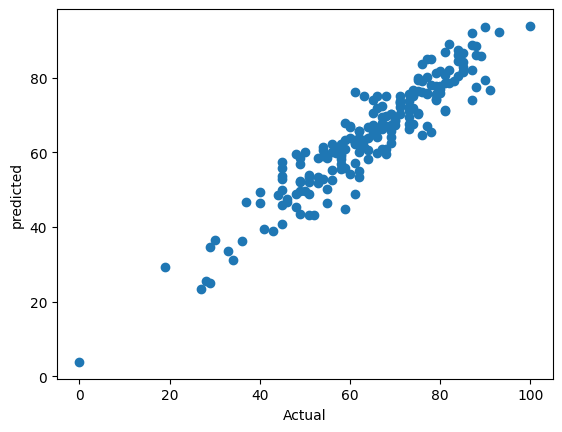

In [115]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')

<Axes: xlabel='math_score'>

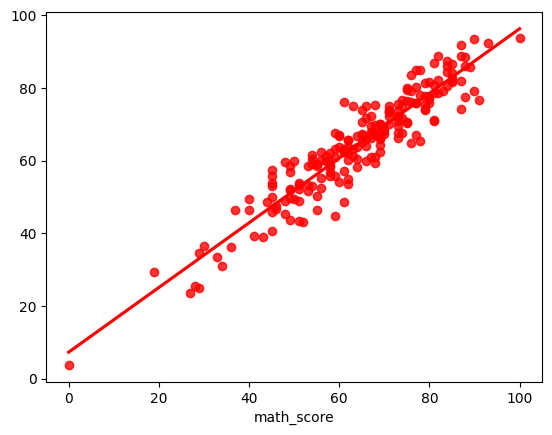

In [116]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

**Difference between Actual and Predicted Values**

In [117]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.703125,14.296875
737,53,58.578125,-5.578125
740,80,76.828125,3.171875
660,74,76.734375,-2.734375
411,84,87.484375,-3.484375
...,...,...,...
408,52,43.125000,8.875000
332,62,62.109375,-0.109375
208,74,67.562500,6.437500
613,65,67.328125,-2.328125
